In [ ]:
#Do the same exercice to approximate (cos(pi/2 t), sin(pi/2 t)), t\in[0,1] with two hidden layers (1,20,20,2) sigmoid function as an activation.


import random
# Initialize a network
def initialize_network ( n_inputs , n_hidden1,n_hidden2 , n_outputs ) :
  network = list ()
  hidden_layer1 = [{'weights':[ random.random() for i in range(n_inputs + 1)]} for i in range(n_hidden1)]
  network.append(hidden_layer1)
  hidden_layer2 = [{'weights':[ random.random() for i in range(n_hidden1 + 1)]} for i in range(n_hidden2)]
  network.append(hidden_layer2)

  # output layer should be defined here
  output_layer=[{'weights':[random.random() for i in range(n_hidden2 + 1)]} for i in range(n_outputs)]
  # output layer should be added to the network here
  network.append(output_layer)

  return network

In [ ]:
network=initialize_network(1,20,20,2)
print(len(network))
for x in network:
  print(x)
  print(len(x))
  print(type(x))

3
[{'weights': [0.21624351728621904, 0.04665688589097694]}, {'weights': [0.550387900292728, 0.25170486294471406]}, {'weights': [0.041677299084336705, 0.72745727447981]}, {'weights': [0.8727278051557921, 0.7062519346332137]}, {'weights': [0.9716717033409303, 0.8723220190245138]}, {'weights': [0.35232474084122034, 0.9323870236301663]}, {'weights': [0.34617597205558137, 0.67216524080608]}, {'weights': [0.9504131347536904, 0.22433830640733876]}, {'weights': [0.5936833086514872, 0.9072068473371664]}, {'weights': [0.5367987997774929, 0.37479093772460315]}, {'weights': [0.0532872386847798, 0.3950793177645563]}, {'weights': [0.5162148695443181, 0.8530398526298306]}, {'weights': [0.8773112011225573, 0.017462279906389377]}, {'weights': [0.9906309715364013, 0.858955157423608]}, {'weights': [0.10583269992506383, 0.6392439989294431]}, {'weights': [0.10844126848133384, 0.4542400530872187]}, {'weights': [0.34805873278220256, 0.21314803158187845]}, {'weights': [0.7393604646216424, 0.8104508339220554]}

In [ ]:
#activation = sum ( weight_i * input_i ) + bias

def activate(weights, inputs):
	activation = weights[-1] #we initialise with the biais
	for i in range(len(weights)-1):
		activation+=weights[i]*inputs[i]
	return activation


import numpy as np

def transfer(activation):
    output = 1 / (1 + np.exp( - activation ))
    return output

In [ ]:
# Forward propagate input to a network output
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            
              neuron['output'] = transfer(activate(neuron['weights'], inputs))
              new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

In [ ]:
forward_propagate(network,[1,0])

[10.747176849339763, 9.855507794327696]

In [ ]:
# Calculate the derivative of an neuron output
def transfer_derivative(x):
    return x - x * x
    

In [ ]:
#Back_propagation:
row=[0.1]
forward_propagate(network,row)
print(network)

[[{'weights': [0.21624351728621904, 0.04665688589097694], 'output': 0.5170636802146739}, {'weights': [0.550387900292728, 0.25170486294471406], 'output': 0.5760902254143189}, {'weights': [0.041677299084336705, 0.72745727447981], 'output': 0.6751617672657937}, {'weights': [0.8727278051557921, 0.7062519346332137], 'output': 0.688587653765674}, {'weights': [0.9716717033409303, 0.8723220190245138], 'output': 0.7250176706865895}, {'weights': [0.35232474084122034, 0.9323870236301663], 'output': 0.7246447590026128}, {'weights': [0.34617597205558137, 0.67216524080608], 'output': 0.6696898953061344}, {'weights': [0.9504131347536904, 0.22433830640733876], 'output': 0.5791730533243549}, {'weights': [0.5936833086514872, 0.9072068473371664], 'output': 0.7244363321102101}, {'weights': [0.5367987997774929, 0.37479093772460315], 'output': 0.6055084547620666}, {'weights': [0.0532872386847798, 0.3950793177645563], 'output': 0.598785692550502}, {'weights': [0.5162148695443181, 0.8530398526298306], 'output

In [ ]:
# Ex8: Backpropagate error and store in neurons
# Backpropagate error and store in neurons

def backward_propagate_error ( network , expected ):
  for i in reversed ( range ( len ( network ))):
    layer = network [i]
    errors = list ()
    if i != len ( network ) -1:
      for j in range ( len ( layer ) ):
        error = 0.0
        for neuron in network [i + 1]:
            error += ( neuron ['weights'][ j] * neuron ['delta'])
        errors.append ( error )
    else :
      for j in range ( len ( layer ) ):
        neuron = layer [j]
        errors . append ( expected [j] - neuron ['output'])
    for j in range ( len ( layer ) ):
      neuron = layer [j]
      neuron ['delta'] = errors [j] * transfer_derivative ( neuron ['output'])


In [ ]:

#np.sin(np.pi*input) 

#(cos(pi/2 t), sin(pi/2 t))

import numpy as np

expected1 = []
expected2 = []
for i in range(100):
  expected1.append(np.cos(np.pi*random.random()/2.0))
  expected2.append(np.sin(np.pi*random.random()/2.0))

expected = [expected1,expected2]



network=initialize_network(1,20,20,2)
forward_propagate(network,[1,0])
backward_propagate_error(network,expected)
for x in network:
  print(x)

[{'weights': [0.013085261209034416, 0.7581000331707675], 'output': 0.6837772409209669, 'delta': array([1.03933508, 1.01633286, 1.0077206 , 1.01461719, 1.0482602 ,
       0.99523045, 1.02205427, 0.98873422, 0.98792968, 0.99763366,
       0.97974206, 0.95752514, 0.97484738, 1.02680256, 1.01989352,
       1.01787575, 1.00674824, 0.99093531, 1.02689104, 1.01847549,
       0.97120888, 0.98472413, 0.99419072, 0.98110914, 1.01840318,
       1.00806942, 1.02058468, 0.96339056, 0.99660555, 1.03362355,
       0.99366611, 0.9773529 , 0.96435485, 1.00369464, 1.02984672,
       1.00550951, 1.01964611, 0.95817857, 1.00993349, 0.97421074,
       0.96253594, 1.05072559, 0.97636621, 1.00440134, 1.01320063,
       1.03099907, 1.02185487, 0.98902629, 0.97256509, 0.98061818,
       0.96936306, 0.99886436, 1.05084851, 1.01596663, 1.02670519,
       0.98510208, 1.00571948, 1.00779238, 1.00019309, 0.98154444,
       0.9578278 , 0.99505968, 0.98962316, 1.01269171, 0.99765102,
       0.96809199, 0.96675998, 1.

In [ ]:
def update_weights(network, row, l_rate):
	for i in range(len(network)): #len(network)=2
		outputs = row 
		if i != 0: #dont change the input layer.
			outputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(outputs)):
				neuron['weights'][j] += l_rate * neuron['delta'] * outputs[j]
			neuron['weights'][-1] += l_rate * neuron['delta']

In [ ]:
def train_network(network, train, l_rate, n_epoch, n_outputs):
  #n_epoch defines number of iterations for the training process
  for epoch in range(n_epoch):
    sum_error = 0
    for row in train:
      outputs = forward_propagate(network,row)#call a forward propagate function for getting output here
      #expected1 =[np.cos(np.pi*i/2.0) for i in row]
      #expected2 = [np.sin(np.pi*i/2.0)for i in row]
      #expected = [expected1,expected2]
      expected =[np.cos(np.pi*row[0]/2.0), np.sin(np.pi*row[0]/2.0)]
      
      #sum_error +=  sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
      sum_error +=  (((expected[0]-outputs[0])**2)+ ((expected[1]-outputs[1])**2))**0.5 
      backward_propagate_error(network,expected)     #compute the mean square error between expected and outputs vectors
      update_weights(network,row,l_rate)
    print('>epoch = %d, lrate=%.3f  ,error=%.3f' %(epoch,l_rate, sum_error))

In [ ]:




from random import seed
number_samples=2000
dataset= [[random.uniform(0,1)]for i in range(number_samples)]
#dataset.append([random.uniform(0,1)]for i in range(number_samples))

network=initialize_network(1,20,20,2)
train_network(network, dataset, 1.5, 25, 2) #the expected is defined above
for layer in network:
	print(layer)

>epoch = 0, lrate=1.500  ,error=1210.054
>epoch = 1, lrate=1.500  ,error=1186.564
>epoch = 2, lrate=1.500  ,error=1187.646
>epoch = 3, lrate=1.500  ,error=1100.608
>epoch = 4, lrate=1.500  ,error=983.730
>epoch = 5, lrate=1.500  ,error=167.409
>epoch = 6, lrate=1.500  ,error=90.640
>epoch = 7, lrate=1.500  ,error=79.758
>epoch = 8, lrate=1.500  ,error=74.827
>epoch = 9, lrate=1.500  ,error=70.726
>epoch = 10, lrate=1.500  ,error=67.131
>epoch = 11, lrate=1.500  ,error=63.901
>epoch = 12, lrate=1.500  ,error=60.941
>epoch = 13, lrate=1.500  ,error=58.195
>epoch = 14, lrate=1.500  ,error=55.626
>epoch = 15, lrate=1.500  ,error=53.218
>epoch = 16, lrate=1.500  ,error=50.960
>epoch = 17, lrate=1.500  ,error=48.846
>epoch = 18, lrate=1.500  ,error=46.872
>epoch = 19, lrate=1.500  ,error=45.029
>epoch = 20, lrate=1.500  ,error=43.310
>epoch = 21, lrate=1.500  ,error=41.708
>epoch = 22, lrate=1.500  ,error=40.219
>epoch = 23, lrate=1.500  ,error=38.840
>epoch = 24, lrate=1.500  ,error=37.571


In [ ]:
def predict(network, row):
	outputs = forward_propagate(network, row)
	return outputs

In [ ]:
result=[]
for i in np.arange(0,1,0.01):
  result.append(predict(network,[i]))

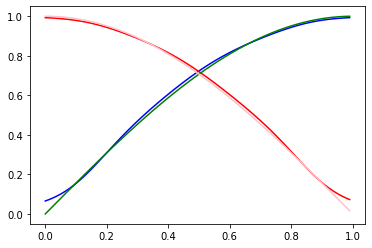

In [ ]:
import matplotlib.pyplot as plt

result_sin=[]
result_cos=[]
for i in range(len(result)):
  result_cos.append(result[i][0])
  result_sin.append(result[i][1])

#(cos(pi/2 t), sin(pi/2 t))

plt.plot(np.arange(0,1,0.01),result_sin,color = 'blue')
plt.plot(np.arange(0,1,0.01),result_cos,color = 'red')
plt.plot(np.arange(0,1,0.01),np.sin(np.pi*np.arange(0,1,0.01)/2),color = 'green')
plt.plot(np.arange(0,1,0.01),np.cos(np.pi*np.arange(0,1,0.01)/2),color = 'pink')